In [1]:
# Libraries

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

# Load dataset

In [64]:
train_data = np.load("data/fashion_train.npy")
X_train, y_train = train_data[:,:784] / 255, train_data[:,-1]

test_data = np.load("data/fashion_test.npy")
X_test, y_test = test_data[:,:784] / 255, test_data[:,-1]

N_CLASSES = len(np.unique(y_train))
CLOTHING_TYPES = {0: "T-shirt/top", 
                  1: "Trouser",
                  2: "Pullover",
                  3: "Dress",
                  4: "Shirt"}

CLOTHING_COLORS = {0: "darkorange", 
                   1: "lightseagreen",
                   2: "orangered",
                   3: "cornflowerblue",
                   4: "orchid"}


# Which types of clothes are there?

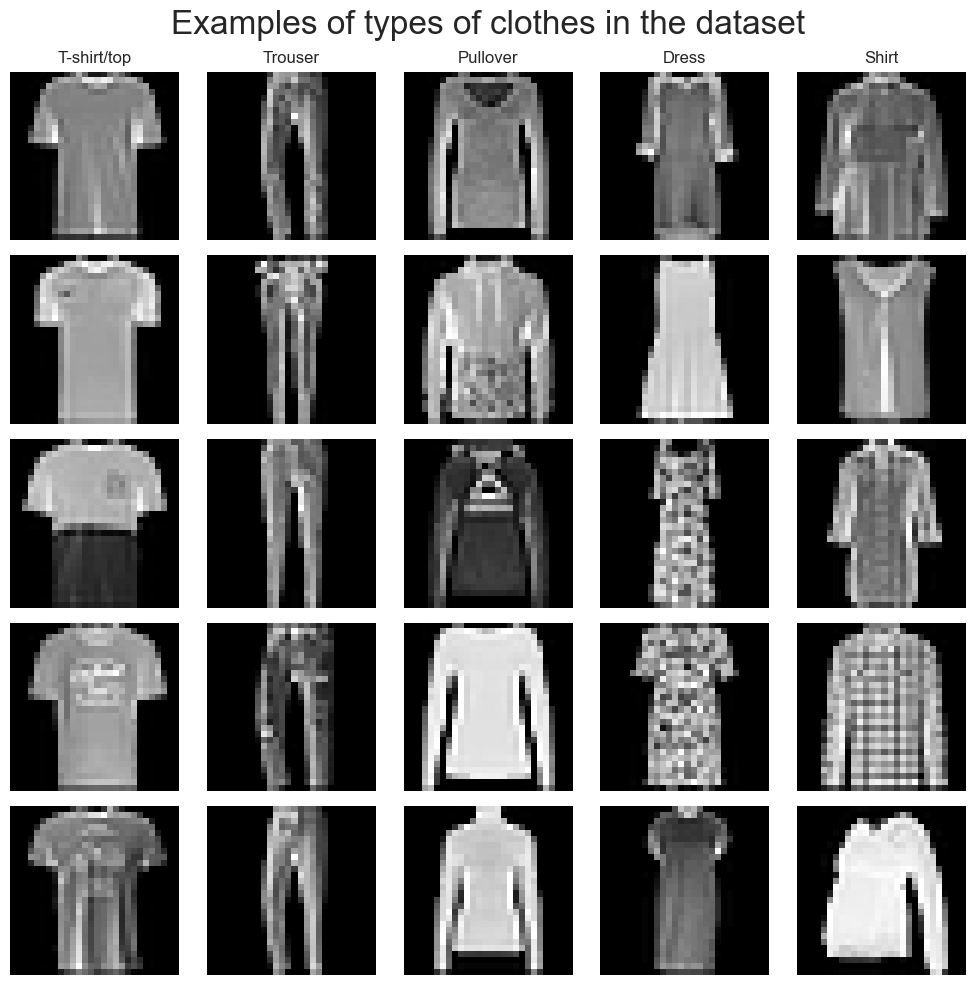

In [65]:
fig, ax = plt.subplots(ncols=N_CLASSES, nrows=N_CLASSES, figsize=(10,10))

for i in range(N_CLASSES):
    for j in range(N_CLASSES):
        ax[j][i].imshow(X_train[np.where(y_train==i)[0][j],:].reshape(28,28), cmap="gray")
        ax[j][i].set_axis_off()
        if j == 0:
            ax[j][i].set_title(CLOTHING_TYPES[i])

fig.suptitle("Examples of types of clothes in the dataset", fontsize=24)
fig.tight_layout()




# How many different observations in each class

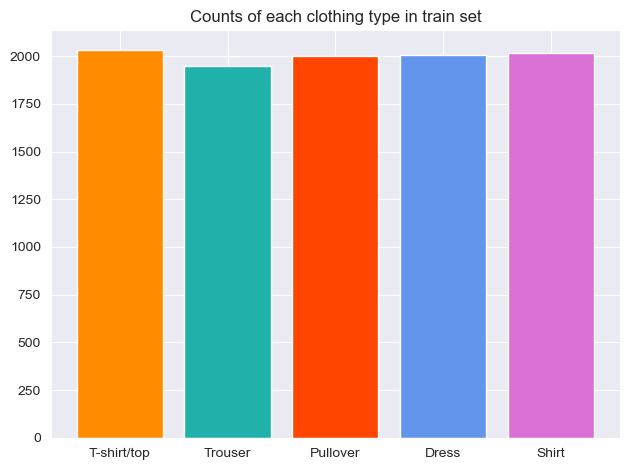

In [66]:
counts = np.unique(y_train, return_counts=True)[1]


plt.bar(x=CLOTHING_TYPES.values(), height=counts, color = CLOTHING_COLORS.values())
plt.title("Counts of each clothing type in train set")
plt.tight_layout();

# Means of different types of clothes

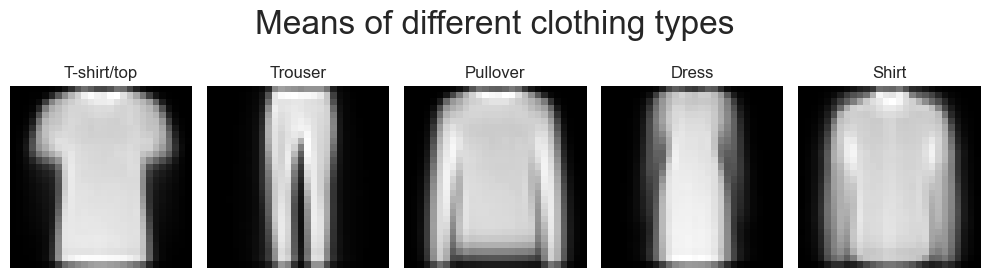

In [67]:
fig, ax = plt.subplots(ncols=N_CLASSES, figsize=(10,3))
fig.suptitle("Means of different clothing types", fontsize=24)

for i in range(N_CLASSES):
    idxs = np.where(y_train==i)
    X_train_picked = X_train[idxs]
    Picked_mean = np.mean(X_train_picked, axis=0)
    ax[i].imshow(Picked_mean.reshape(28,28), cmap="grey")
    ax[i].set_axis_off()
    ax[i].set_title(CLOTHING_TYPES[i])

fig.tight_layout()